<a href="https://colab.research.google.com/github/AkshitChugh787/tensorflow/blob/main/RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2021-05-14 13:51:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  66.2MB/s    in 2.9s    

2021-05-14 13:51:43 (66.2 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-05-14 13:51:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.128, 64.233.191.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-test-set.z 100%[===================>]  28.15M  34.4MB/s    in 0.8s    

2021-05-14 13:51:56 (34.4 MB/s) - ‘/tmp/rps-test-set.zip’ saved [29516758/29516758]



In [ ]:
import os
import zipfile
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

In [ ]:
print('Total Rock files (in training):', len(os.listdir(rock_dir)))
print('Total Paper files (in training):', len(os.listdir(paper_dir)))
print('Total Scissors files (in training) :', len(os.listdir(scissors_dir)))

Total Rock files (in training): 840
Total Paper files (in training): 840
Total Scissors files (in training) : 840


In [ ]:
rock_files = os.listdir(rock_dir)
print(rock_files[:15])
paper_files = os.listdir(paper_dir)
print(paper_files[:7])
scissors_files = os.listdir(scissors_dir)
print(scissors_files[:9])

['rock03-035.png', 'rock02-063.png', 'rock03-027.png', 'rock05ck01-066.png', 'rock01-092.png', 'rock01-026.png', 'rock07-k03-001.png', 'rock04-020.png', 'rock03-081.png', 'rock07-k03-119.png', 'rock01-001.png', 'rock02-031.png', 'rock04-104.png', 'rock02-058.png', 'rock07-k03-037.png']
['paper05-020.png', 'paper06-034.png', 'paper04-060.png', 'paper04-041.png', 'paper02-080.png', 'paper02-040.png', 'paper04-008.png']
['testscissors01-110.png', 'scissors03-050.png', 'testscissors03-006.png', 'scissors03-040.png', 'scissors02-017.png', 'scissors04-065.png', 'testscissors03-022.png', 'testscissors02-005.png', 'testscissors03-118.png']


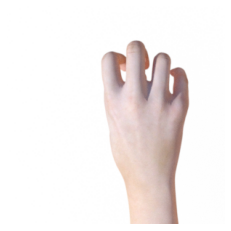

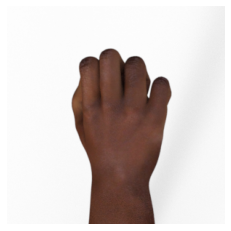

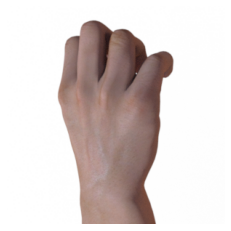

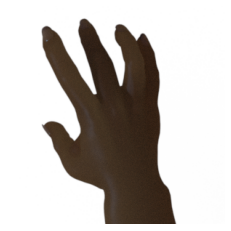

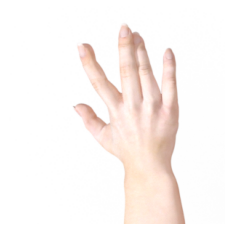

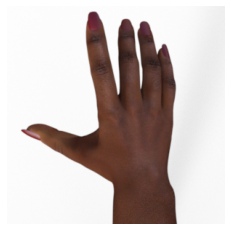

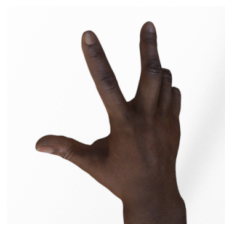

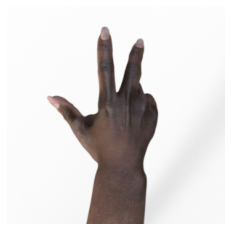

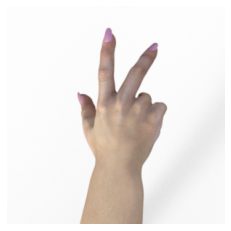

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index_file = 5

rrock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[index_file:index_file+3]]
ppaper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[index_file:index_file+3]]
sscissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[index_file:index_file+3]]

for i, img_path in enumerate( rrock + ppaper + sscissors ):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 372 images belonging to 3 classes.


In [27]:
model = tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [31]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 177s 9s/step - loss: 1.1011 - accuracy: 0.3607 - val_loss: 1.0892 - val_accuracy: 0.5484
Epoch 2/25
20/20 [==============================] - 175s 9s/step - loss: 1.0781 - accuracy: 0.4087 - val_loss: 0.9957 - val_accuracy: 0.5054
Epoch 3/25
20/20 [==============================] - 175s 9s/step - loss: 1.0274 - accuracy: 0.4611 - val_loss: 0.9080 - val_accuracy: 0.7500
Epoch 4/25
20/20 [==============================] - 175s 9s/step - loss: 0.8554 - accuracy: 0.6048 - val_loss: 0.4821 - val_accuracy: 0.9543
Epoch 5/25
20/20 [==============================] - 175s 9s/step - loss: 0.7205 - accuracy: 0.6861 - val_loss: 0.4468 - val_accuracy: 0.9167
Epoch 6/25
20/20 [==============================] - 176s 9s/step - loss: 0.6078 - accuracy: 0.7278 - val_loss: 0.3418 - val_accuracy: 0.9973
Epoch 7/25
20/20 [==============================] - 176s 9s/step - loss: 0.5252 - accuracy: 0.7794 - val_loss: 0.3883 - val_accuracy: 1.0000
Epoch 8/25
20

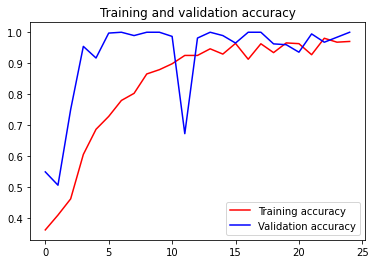

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()






In [43]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving acrock2.jpg to acrock2 (2).jpg
Saving acrock1.jpg to acrock1 (2).jpg
Saving acsci2.jpg to acsci2 (2).jpg
Saving acsci1.jpg to acsci1 (2).jpg
Saving acpaper2.jpg to acpaper2 (2).jpg
Saving acpaper1.jpg to acpaper1 (2).jpg
acrock2.jpg
[[0. 1. 0.]]
acrock1.jpg
[[0. 1. 0.]]
acsci2.jpg
[[0. 0. 1.]]
acsci1.jpg
[[1. 0. 0.]]
acpaper2.jpg
[[1. 0. 0.]]
acpaper1.jpg
[[1. 0. 0.]]
